In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns           
import sklearn                 

In [3]:
#url = 'https://www.kaggle.com/datasets/adityaramachandran27/nasa-near-earth-objects-information'
data = pd.read_csv("NASA Near-Earth Objects.csv")
initial_data = data

In [4]:
data

,Unnamed: 0,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,0,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
1,1,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2,2,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
3,3,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
4,4,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23995,54073361,54073361,(2020 UQ),NaN,2020 UQ,26.90,False,False,0.011080,0.024777,3,APO,0.608650,1.901363,2020-10-16,2020-10-19,Near-Earth asteroid orbits which cross the Ear...
23996,23996,54073362,54073362,(2020 UR),NaN,2020 UR,27.90,False,False,0.006991,0.015633,4,APO,0.732739,1.887929,2020-10-16,2020-10-19,Near-Earth asteroid orbits which cross the Ear...
23997,23997,54073363,54073363,(2020 US),NaN,2020 US,27.20,False,False,0.009651,0.021579,5,APO,0.788983,2.851299,2020-10-16,2020-10-21,Near-Earth asteroid orbits which cross the Ear...
23998,23998,54073365,54073365,(2020 UT),NaN,2020 UT,27.33,False,False,0.009090,0.020325,2,AMO,1.045124,4.170737,2020-10-15,2020-10-18,Near-Earth asteroid orbits similar to that of ...


Набор данных, созданный А. Рамачандраном на основе информации с официального сайта NASA, содержит информацию об околоземных небесных объектах.

id: Идентификационный номер небесного тела по NASA (числовое)<br>
neo_reference_id: Идентификационный номер небесного тела по NASA (равен id)<br>
name: Официальное название (текстовое)<br>
name_limited: Короткое название (текстовое)<br>
designation: Число, используемое в официальном названии (числовое)<br>
absolute_magnitude: Абсолютная звездная величина (числовое)<br>
is_potentially_hazardous_asteroid: Является ли объект потенциально опасным для Земли (бинарное)<br>
is_sentry_object: Присутствует ли объект в системе мониторинга Sentry (бинарное)<br>
kilometers_estimated_diameter_min: Нижняя оценка диаметра объекта (числовое)<br>
kilometers_estimated_diameter_max: Верхняя оценка диаметра объекта (числовое)<br>
orbit_id: Идентификационный номер орбиты (числовое)<br>
orbit_class_type: Класс орбиты (категориальное)<br>
perihelion_distance: Перигелиевое расстояние до Земли (числовое)<br>
aphelion_distance: Афелиевое расстояние до Земли (числовое)<br>
first_observation_date: Дата первого наблюдения объекта (текстовое)<br>
last_observation_date: Дата последнего на текущий момент наблюдения объекта (текстовое)<br>
orbit_class_description: Описание класса орбиты (текстовое)<br>

Некоторые из этих полей, такие как различные идентификационные номера, смысловой нагрузки не несут и не будут учитываться при решении задачи.

Задача классификации состоит в том, чтобы предсказать, представляет ли объект потенциальную опасность для планеты Земля.

In [5]:
data.describe()

,Unnamed: 0,id,neo_reference_id,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance
count,24000.000000,2.400000e+04,2.400000e+04,23992.000000,23992.000000,23992.000000,24000.000000,24000.000000
mean,11999.500000,7.275111e+06,7.275111e+06,22.942274,0.167777,0.375160,0.915225,2.653104
std,6928.347566,1.333987e+07,1.333987e+07,2.952871,0.293000,0.655169,0.232201,4.468233
min,0.000000,2.001981e+06,2.001981e+06,12.580000,0.000609,0.001362,0.070431,0.653754
25%,5999.750000,3.409962e+06,3.409962e+06,20.650000,0.024241,0.054205,0.785150,1.706281
50%,11999.500000,3.703790e+06,3.703790e+06,23.200000,0.060891,0.136157,0.965325,2.480109
75%,17999.250000,3.803897e+06,3.803897e+06,25.200000,0.197040,0.440595,1.068984,3.397965
max,23999.000000,5.408749e+07,5.408749e+07,33.200000,8.101305,18.115068,1.299988,631.895456


In [6]:
data.corr()

,Unnamed: 0,id,neo_reference_id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance
Unnamed: 0,1.000000,0.479754,0.479754,0.457491,-0.195072,0.038921,-0.422163,-0.422163,0.023243,-0.002067
id,0.479754,1.000000,1.000000,0.148852,-0.058072,0.013747,-0.118195,-0.118195,0.010260,-0.005660
neo_reference_id,0.479754,1.000000,1.000000,0.148852,-0.058072,0.013747,-0.118195,-0.118195,0.010260,-0.005660
absolute_magnitude_h,0.457491,0.148852,0.148852,1.000000,-0.298137,0.283211,-0.715415,-0.715415,-0.036526,-0.074962
is_potentially_hazardous_asteroid,-0.195072,-0.058072,-0.058072,-0.298137,1.000000,-0.058774,0.175040,0.175040,-0.206415,0.009947
is_sentry_object,0.038921,0.013747,0.013747,0.283211,-0.058774,1.000000,-0.109334,-0.109334,-0.090673,-0.006609
kilometers_estimated_diameter_min,-0.422163,-0.118195,-0.118195,-0.715415,0.175040,-0.109334,1.000000,1.000000,-0.003524,0.054581
kilometers_estimated_diameter_max,-0.422163,-0.118195,-0.118195,-0.715415,0.175040,-0.109334,1.000000,1.000000,-0.003524,0.054581
perihelion_distance,0.023243,0.010260,0.010260,-0.036526,-0.206415,-0.090673,-0.003524,-0.003524,1.000000,0.052073
aphelion_distance,-0.002067,-0.005660,-0.005660,-0.074962,0.009947,-0.006609,0.054581,0.054581,0.052073,1.000000


<AxesSubplot:>

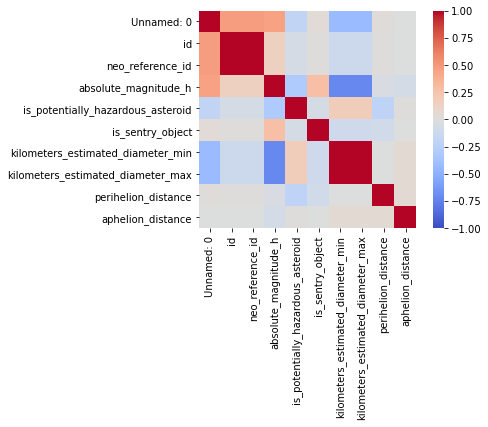

In [7]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Из матрицы корреляций видно, что нижняя и верхняя оценки диаметра объекта сильно коррелируют, так как современные методы оценки размеров небесного тела довольно точны. Также стоит заметить, что абсолютная звездная величина имеет обратную корреляцию с диаметром объекта, но не коррелирует с расстоянием до Земли. Это соответствует физическому смыслу абсолютной звездной величины, которая, в отличие от относительной, характеризует действительную светимость объекта для наблюдателя, расположенного на фиксированном расстоянии.

In [8]:
data.isnull().sum()

Unnamed: 0                               0
id                                       0
neo_reference_id                         0
name                                     0
name_limited                         23856
designation                              0
absolute_magnitude_h                     8
is_potentially_hazardous_asteroid        0
is_sentry_object                         0
kilometers_estimated_diameter_min        8
kilometers_estimated_diameter_max        8
orbit_id                                 0
orbit_class_type                         0
perihelion_distance                      0
aphelion_distance                        0
first_observation_date                   0
last_observation_date                    0
orbit_class_description                  0
dtype: int64

Пропущенные значения присутствуют в столбце, соответствующему короткому имени объекта. Само имя никак не влияет на характеристики небесного тела, однако сам факт существования короткого имени может говорить о том, что объект является более значимым: если короткое имя еще не устоялось, то, скорее всего, объект редко упоминается в научных статьях и исследованиях. Поэтому целесообразно заменить поле имени на бинарное, присвоив 1 для тех объектов, у которых соответствующее значение присутствует, и 0 для тех, у которых оно пропущено.

In [9]:
data["short_name_exists"] = data["name_limited"].notnull()

Объекты, для которых отстутствуют значения в полях диаметра и звездной величины, можно удалить. Это не сильно повлияет на величину выборки, в то время как их присутствие (с записанными в эти ячейки, например, средними значениями соответствующего поля) может внести нежелательные помехи.

In [10]:
data = data.dropna(subset = ['absolute_magnitude_h'])
data = data.dropna(subset = ['kilometers_estimated_diameter_min'])
data = data.dropna(subset = ['kilometers_estimated_diameter_max'])

In [11]:
data.isnull().sum()

Unnamed: 0                               0
id                                       0
neo_reference_id                         0
name                                     0
name_limited                         23841
designation                              0
absolute_magnitude_h                     0
is_potentially_hazardous_asteroid        0
is_sentry_object                         0
kilometers_estimated_diameter_min        0
kilometers_estimated_diameter_max        0
orbit_id                                 0
orbit_class_type                         0
perihelion_distance                      0
aphelion_distance                        0
first_observation_date                   0
last_observation_date                    0
orbit_class_description                  0
short_name_exists                        0
dtype: int64

In [12]:
data = data.drop(['id', 'neo_reference_id', 'name', 'name_limited', 'designation', 'orbit_id', 'orbit_class_description'], axis=1)

Заменим бинарные признаки на числовые.

In [13]:
data['is_potentially_hazardous_asteroid'] = pd.factorize(data['is_potentially_hazardous_asteroid'])[0]
data['is_sentry_object'] = 1 - pd.factorize(data['is_sentry_object'])[0]
data['short_name_exists'] = 1 - pd.factorize(data['short_name_exists'])[0]

Поле orbit_class_type является категориальным. Добавим несколько бинарных полей, соответствующих принадлежности орбиты объекта каждому из классов.

In [14]:
data.orbit_class_type.unique()

array(['APO', 'AMO', 'ATE', 'IEO'], dtype=object)

In [15]:
data = pd.concat((data, pd.get_dummies(data['orbit_class_type'])), axis = 1)
data = data.drop('orbit_class_type', axis = 1)

Из полей, отвечающих за первую и последнюю дату наблюдения объекта, можно выделить год этих событий.

In [16]:
data['first_observation_date'] = pd.to_datetime(data['first_observation_date'], errors = 'coerce', format= '%Y-%m-%d').dt.year
data['last_observation_date'] = pd.to_datetime(data['last_observation_date'], errors = 'coerce', format= '%Y-%m-%d').dt.year

In [17]:
data.isnull().sum()

Unnamed: 0                           0
absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
perihelion_distance                  0
aphelion_distance                    0
first_observation_date               1
last_observation_date                0
short_name_exists                    0
AMO                                  0
APO                                  0
ATE                                  0
IEO                                  0
dtype: int64

In [18]:
data[data['first_observation_date'].isnull()]

,Unnamed: 0,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,short_name_exists,AMO,APO,ATE,IEO
20702,20702,20.6,1,1,0.20163,0.450858,1.077174,1.865083,NaN,2019,0,1,0,0,0


In [19]:
initial_data.iloc[20702]

Unnamed: 0                                                                       20702
id                                                                             3843794
neo_reference_id                                                               3843794
name                                                                        (2019 RN1)
name_limited                                                                       NaN
designation                                                                   2019 RN1
absolute_magnitude_h                                                              20.6
is_potentially_hazardous_asteroid                                                False
is_sentry_object                                                                 False
kilometers_estimated_diameter_min                                              0.20163
kilometers_estimated_diameter_max                                             0.450858
orbit_id                                   

In [20]:
data.loc[20702, 'first_observation_date'] = 2008

Проведем стандардизацию.

In [21]:
columns_to_standardise = ['absolute_magnitude_h', 'kilometers_estimated_diameter_min', 'kilometers_estimated_diameter_max',
                         'perihelion_distance', 'aphelion_distance', 'first_observation_date', 'last_observation_date']

data[columns_to_standardise] = (data[columns_to_standardise] - data[columns_to_standardise].mean(axis = 0))/data[columns_to_standardise].std(axis = 0)
data

,Unnamed: 0,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,short_name_exists,AMO,APO,ATE,IEO
0,0,-2.615049,0,1,7.624271,7.624271,-1.264898,0.062186,-4.737941,0.993393,1,0,1,0,0
1,1,-2.361072,1,1,5.230367,5.230367,1.392636,0.312007,-5.958084,0.993393,1,1,0,0,0
2,2,-2.229005,1,1,4.276392,4.276392,0.582341,0.184524,-6.324127,0.993393,1,1,0,0,0
3,3,-1.978414,1,1,2.876095,2.876095,-0.538423,-0.337793,-6.934199,0.580143,1,0,0,1,0
4,4,-1.917460,1,1,2.601757,2.601757,-0.920833,-0.268173,-4.249884,0.993393,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23995,1.340212,1,1,-0.534695,-0.534695,-1.320295,-0.168261,0.996733,0.786768,0,0,1,0,0
23996,23996,1.678848,1,1,-0.548650,-0.548650,-0.785844,-0.171267,0.996733,0.786768,0,0,1,0,0
23997,23997,1.441803,1,1,-0.539574,-0.539574,-0.543597,0.044274,0.996733,0.786768,0,0,1,0,0
23998,23998,1.485825,1,1,-0.541488,-0.541488,0.559604,0.339480,0.996733,0.786768,0,1,0,0,0


Разобъем выборку на обучающую и тестовую подвыборки.

In [22]:
X = data.drop(['is_potentially_hazardous_asteroid'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data['is_potentially_hazardous_asteroid'], test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(17988, 5997)

Запустим классификатор ближайших соседей с различным числом соседей.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)
print(err_test)
print(err_train)

0.087877271969318
0.08627974205025572


In [25]:

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)
print(err_test)
print(err_train)

0.09171252292813073
0.08133199911051812


In [27]:
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [28]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)
print(err_test)
print(err_train)

0.08420877105219277
0.08828107627307094


In [29]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [30]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)
print(err_test)
print(err_train)

0.08420877105219277
0.08828107627307094


Итак, был рассмотрен набор данных с описанием околоземных небесных объектов с задачей определить среди них представляющие потенциальную угрозу Земле. Для этого применялся классификатор ближайших соседей. Можно заметить, что при увеличении числа соседей ошибка уменьшается, но только до определенного значения. Поэтому в дальнейшем увеличении этого числа нет смысла, так как это лишь ухудшит производительность.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['is_potentially_hazardous_asteroid'], test_size = 0.25, 
                                                    random_state = 231222)
N_test, _ = X_test.shape

from sklearn.linear_model import LogisticRegression
#max_iter = max_iter * 10

logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)

y_test_pred = logistic_model.predict(X_test)

np.mean(y_test != y_test_pred)

0.09204602301150576

Для тренировочной выборки была обучена логистическая регрессия. Можно заметить, что значение средней ошибки примерно равно доле опасных астероидов в наборе данных, из чего можно делать вывод, что данный метод не оказался эффективным.

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[ 115  164]
 [ 391 5327]]


In [61]:
from sklearn import ensemble
rf_model = ensemble.RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train, y_train)


MSE_train = np.mean((rf_model.predict(X_train) - y_train)**2)

y_test_pred_rf = rf_model.predict(X_test)
MSE_test  = np.mean((y_test_pred_rf - y_test )**2)
print(MSE_train, MSE_test)

prediction_classes=[1 if prob>0.5 else 0 for prob in np.ravel(y_test_pred_rf)]
print(confusion_matrix(prediction_classes, y_test))

0.007274927729597496 0.05027632149408036
[[ 215  181]
 [ 291 5310]]


RandomForest показал более удачные результаты. Из confusion matrix видно, что классификатор распознал более половины опасных астероидов.

Далее была обучена полносвязная нейронная сеть MLPRegressor с одним скрытым слоем.

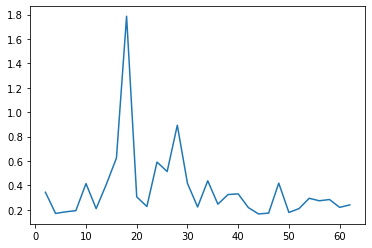

In [49]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

nNeurs = []
test_errors = []
train_errors = []

for neurons in range(2, 64, 2):

    model = MLPRegressor(hidden_layer_sizes = (neurons, ), random_state=1)
    model.fit(X_train, y_train)
    
    X_test_pred_regr = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, X_test_pred_regr))
    
    X_train_pred_regr= model.predict(X_train)
    train_errors.append(mean_absolute_error(y_train, X_train_pred_regr))
    
    nNeurs.append(neurons)
    
#plt.plot(nNeurs, test_errors, label="Test data errors")
plt.plot(nNeurs, train_errors, label="Training data errors")

График показывает зависимость ошибки от числа нейронов в слое.

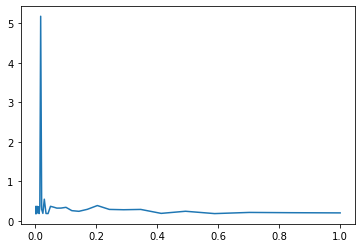

In [50]:
alphas = []
test_errors = []
train_errors = []

neurons = 44


#print(np.geomspace(0.001, 0.5, 30))

for alpha in np.geomspace(0.001, 1, 40):

    model = MLPRegressor(hidden_layer_sizes = (neurons, ), alpha = alpha, random_state=1)
    model.fit(X_train, y_train)
    
    X_test_pred_regr = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, X_test_pred_regr))
    
    X_train_pred_regr= model.predict(X_train)
    train_errors.append(mean_absolute_error(y_train, X_train_pred_regr))
    
    alphas.append(alpha)
    
#plt.plot(alphas, test_errors, label="Test data errors")
plt.plot(alphas, train_errors, label="Training data errors")



График показывает зависимость ошибки от параметра alpha. Заметим, что начиная с некоторого значения ошибка стабилизируется, после чего наблюдается переобучение.

In [70]:
neurons = 44
alpha = 0.3

model = MLPRegressor(hidden_layer_sizes = (neurons, ), alpha = alpha, random_state=1)
model.fit(X_train, y_train)
    
X_test_pred_regr = model.predict(X_test)
test_errors.append(mean_absolute_error(y_test, X_test_pred_regr))
    
X_train_pred_regr= model.predict(X_train)
train_errors.append(mean_absolute_error(y_train, X_train_pred_regr))

prediction_classes=[1 if prob>0.5 else 0 for prob in np.ravel(X_test_pred_regr)]
print(confusion_matrix(y_test, prediction_classes))

[[  34  472]
 [  51 5440]]


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy: {accuracy_score(y_test, prediction_classes)}')
print(f'Precision: {precision_score(y_test, prediction_classes)}')
print(f'Recall: {recall_score(y_test, prediction_classes)}')

Accuracy: 0.9127897281974321
Precision: 0.9201623815967523
Recall: 0.9907120743034056


При фиксированных параметрах обучен MLPRegressor. Судя по тому, что Accuracy не сильно выше, чем у классификатора, всегда возвращающего 0, можно сделать вывод о неудаче применения подхода.

Итак, были обучены логистическая регрессия, RandomForest и MLPRegressor. Из них наиболее приемлемый результат показал RandomForest.